In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Load data
df = pd.read_csv('SuperStore_Orders.csv', encoding='latin2')
df['sales'] = df['sales'].str.replace(',', '', regex=False).astype(float)
df['year'] = df['year'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [18]:
df.head()

,ship_mode,segment,state,country,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,408.0,2,0.0,106.140,35.46,Medium,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,120.0,3,0.1,36.036,9.72,Medium,2011
2,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,66.0,4,0.0,29.640,8.17,High,2011
3,Second Class,Home Office,Stockholm,Sweden,EU,North,Office Supplies,Paper,45.0,3,0.5,-26.055,4.82,High,2011
4,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,114.0,5,0.1,37.770,4.70,Medium,2011


In [62]:
cols_to_drop = [
    'order_id', 
    'order_date', 
    'ship_date', 
    'customer_name', 
    'product_id', 
    'product_name'
]

# Drop kolom dari dataframe
df = df.drop(columns=cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ship_mode       51290 non-null  object 
 1   segment         51290 non-null  object 
 2   state           51290 non-null  object 
 3   country         51290 non-null  object 
 4   market          51290 non-null  object 
 5   region          51290 non-null  object 
 6   category        51290 non-null  object 
 7   sub_category    51290 non-null  object 
 8   sales           51290 non-null  float64
 9   quantity        51290 non-null  int64  
 10  discount        51290 non-null  float64
 11  profit          51290 non-null  float64
 12  shipping_cost   51290 non-null  float64
 13  order_priority  51290 non-null  object 
 14  year            51290 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 5.9+ MB


# Shipping Cost

In [21]:
# 2. Tentukan kolom target dan kategorik
target = 'shipping_cost'
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 3. Simpan hasil ANOVA
anova_results = []

# 4. Loop setiap fitur kategorikal
for col in categorical_cols:
    formula = f'{target} ~ C({col})'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Ambil F dan p-value dari baris C(col)
    f_val = anova_table.loc[f'C({col})', 'F']
    p_val = anova_table.loc[f'C({col})', 'PR(>F)']
    anova_results.append({'Feature': col, 'F_value': f_val, 'p_value': p_val})

# 5. Buat dataframe hasil dan urutkan
anova_df = pd.DataFrame(anova_results)
anova_df_sorted = anova_df.sort_values(by='F_value', ascending=False)

# 6. Tampilkan hasil
pd.options.display.float_format = '{:.6e}'.format
print(anova_df_sorted)

          Feature      F_value       p_value
6        category 2.427126e+03  0.000000e+00
8  order_priority 7.282672e+02  0.000000e+00
7    sub_category 6.717117e+02  0.000000e+00
0       ship_mode 3.939253e+02 5.324038e-253
4          market 9.795918e+01 5.307156e-123
5          region 4.503154e+01 2.172867e-107
3         country 7.698221e+00 1.582053e-148
2           state 1.980443e+00  1.350908e-70
9            year 8.615089e-01  4.602157e-01
1         segment 1.797872e-01  8.354485e-01


1. category
2. order_priority
3. sub_category
4. ship_mode
5. market
6. region
7. country
8. state

# Profit

In [ ]:
# 2. Tentukan kolom target dan kategorik
target = 'profit'
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 3. Simpan hasil ANOVA
anova_results = []

# 4. Loop setiap fitur kategorikal
for col in categorical_cols:
    formula = f'{target} ~ C({col})'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Ambil F dan p-value dari baris C(col)
    f_val = anova_table.loc[f'C({col})', 'F']
    p_val = anova_table.loc[f'C({col})', 'PR(>F)']
    anova_results.append({'Feature': col, 'F_value': f_val, 'p_value': p_val})

# 5. Buat dataframe hasil dan urutkan
anova_df = pd.DataFrame(anova_results)
anova_df_sorted = anova_df.sort_values(by='F_value', ascending=False)

# 6. Tampilkan hasil
pd.options.display.float_format = '{:.6e}'.format
print(anova_df_sorted)

          Feature      F_value       p_value
6        category 3.042301e+02 4.489104e-132
7    sub_category 1.038995e+02  0.000000e+00
5          region 3.428132e+01  3.218862e-80
4          market 2.824399e+01  6.676329e-34
3         country 2.224210e+01  0.000000e+00
2           state 4.707880e+00  0.000000e+00
8  order_priority 1.569623e+00  1.944132e-01
9            year 2.795162e-01  8.402259e-01
1         segment 2.220602e-01  8.008679e-01
0       ship_mode 1.053396e-01  9.569877e-01


1. category
2. sub_category
3. region
4. market
5. country
6. state

# Model

In [ ]:
df = df[['shipping_cost','category', 'sub_category', 'market', 'region', 'country', 'state','ship_mode','order_priority','sales','discount','profit','quantity']]
df = df.rename(columns={'sub_category': 'subcategory'})
df = df.rename(columns={'ship_mode': 'shipmode'})
df = df.rename(columns={'order_priority': 'orderpriority'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shipping_cost  51290 non-null  float64
 1   category       51290 non-null  object 
 2   subcategory    51290 non-null  object 
 3   market         51290 non-null  object 
 4   region         51290 non-null  object 
 5   country        51290 non-null  object 
 6   state          51290 non-null  object 
 7   shipmode       51290 non-null  object 
 8   orderpriority  51290 non-null  object 
 9   sales          51290 non-null  float64
 10  discount       51290 non-null  float64
 11  profit         51290 non-null  float64
 12  quantity       51290 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 5.1+ MB


# Shipping_Cost

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# 1. Dataset kamu
# df = df[['sales','category', 'sub_category', 'market', 'region', 'country', 'state']]
X = df.drop(columns='shipping_cost')
y = df['shipping_cost']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocessing: OneHotEncoding untuk semua fitur (semua kategorikal)
categorical_features = X.columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 4. Definisikan model-model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# 5. Training & evaluasi
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE' : np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² Score': r2_score(y_test, y_pred)
    })

# 6. Tampilkan hasil
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print(results_df)

               Model        MAE          MSE       RMSE  R² Score
1   Ridge Regression  16.211734  1619.026069  40.237123  0.522528
4            XGBoost  17.958505  1855.159890  43.071567  0.452890
0  Linear Regression  16.365536  1888.459077  43.456404  0.443069
2      Random Forest  15.782310  2096.166315  45.783909  0.381814
3  Gradient Boosting  20.232866  2304.823356  48.008576  0.320278


R² Score: 0.6410927854865913
MAE: 14.154153402686315

Top 15 Feature Importance (Ridge):
                       Feature  Coefficient
1267    orderpriority_Critical    15.482947
1270      orderpriority_Medium   -13.060457
1266   shipmode_Standard Class    -8.837144
1263      shipmode_First Class     7.980022
1     category_Office Supplies    -5.378120
1264         shipmode_Same Day     4.060417
1268        orderpriority_High    -3.352946
1265     shipmode_Second Class    -3.203295
2          category_Technology     3.030837
12     subcategory_Furnishings    -2.458879
4       subcategory_Appliances     2.403333
0           category_Furniture     2.347282
16          subcategory_Phones     2.182027
7        subcategory_Bookcases     1.786892
1272                  discount    -1.740609


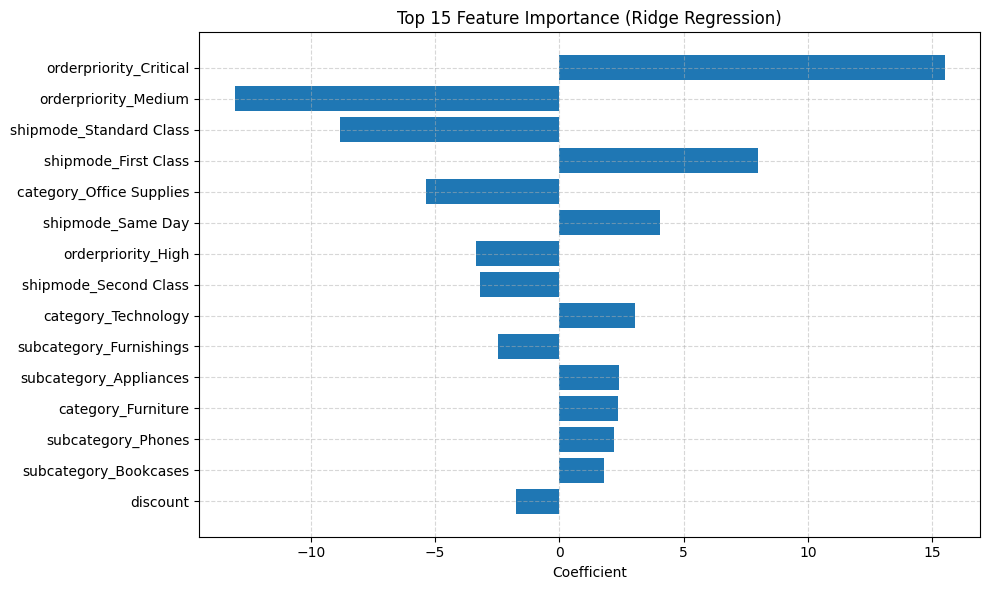

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset kamu
# df = df[['shipping_cost','category', 'sub_category', 'market', 'region', 'country', 'state',
#          'ship_mode','order_priority','sales','discount','profit','quantity']]

X = df.drop(columns='shipping_cost')
y = df['shipping_cost']

# 2. Pisahkan fitur numerik dan kategorikal
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# 3. Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numerical_features)
])

# 4. Pipeline Ridge
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Ridge())
])

# 5. Split dan Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_pipeline.fit(X_train, y_train)

# 6. Evaluasi
y_pred = ridge_pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# 7. Ambil nama fitur setelah transformasi
ohe = ridge_pipeline.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_features, numerical_features])

# 8. Ambil koefisien dan tampilkan feature importance
coefficients = ridge_pipeline.named_steps['regressor'].coef_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

# 9. Print top 15 fitur
print("\nTop 15 Feature Importance (Ridge):")
print(importance_df.head(15)[['Feature', 'Coefficient']])

# 10. Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(15)['Feature'], importance_df.head(15)['Coefficient'])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importance (Ridge Regression)')
plt.xlabel('Coefficient')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Feature importance berdasarkan kolom asli:
   OriginalFeature  AvgAbsCoefficient
7    orderpriority           8.206701
6         shipmode           6.020219
0         category           3.585413
9         discount           1.740609
1      subcategory           1.439543
11        quantity           1.232809
2           market           0.628563
3           region           0.263135
8            sales           0.084335
4          country           0.078222
5            state           0.026165
10          profit           0.000462


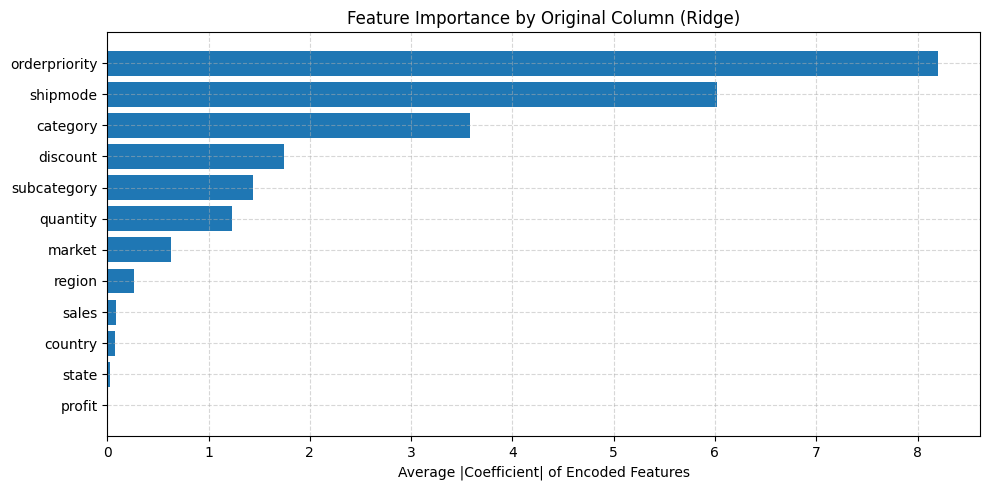

In [59]:
from collections import defaultdict

# Ambil hasil OneHotEncoder
ohe = ridge_pipeline.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)

# Gabungkan semua nama fitur: ohe + numerik
all_feature_names = np.concatenate([ohe_features, numerical_features])
coefficients = ridge_pipeline.named_steps['regressor'].coef_

# Buat mapping kolom asli ke importance gabungan
feature_group_importance = defaultdict(list)

for feature_name, coef in zip(all_feature_names, coefficients):
    # Kalau hasil OneHot, misalnya: category_Office Supplies → ambil 'category'
    if '_' in feature_name:
        base_feature = feature_name.split('_')[0]
    else:
        base_feature = feature_name
    feature_group_importance[base_feature].append(abs(coef))  # pakai abs supaya magnitude-nya adil

# Ambil nilai rata-rata atau total importance per kolom asli
importance_summary = {
    feature: np.mean(coefs) for feature, coefs in feature_group_importance.items()
}

# Konversi ke DataFrame dan urutkan
importance_df = pd.DataFrame({
    'OriginalFeature': list(importance_summary.keys()),
    'AvgAbsCoefficient': list(importance_summary.values())
}).sort_values(by='AvgAbsCoefficient', ascending=False)

# Tampilkan hasil
print("Feature importance berdasarkan kolom asli:")
print(importance_df)

# Optional: Visualisasi
plt.figure(figsize=(10, 5))
plt.barh(importance_df['OriginalFeature'], importance_df['AvgAbsCoefficient'])
plt.gca().invert_yaxis()
plt.title('Feature Importance by Original Column (Ridge)')
plt.xlabel('Average |Coefficient| of Encoded Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Profit

In [ ]:
df = df[['profit','category', 'sub_category', 'market', 'region', 'country', 'state','sales','quantity','discount']]
df = df.rename(columns={'sub_category': 'subcategory'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   profit       51290 non-null  float64
 1   category     51290 non-null  object 
 2   subcategory  51290 non-null  object 
 3   market       51290 non-null  object 
 4   region       51290 non-null  object 
 5   country      51290 non-null  object 
 6   state        51290 non-null  object 
 7   sales        51290 non-null  float64
 8   quantity     51290 non-null  int64  
 9   discount     51290 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 3.9+ MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# 1. Dataset 
X = df.drop(columns='profit')
y = df['profit']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocessing: OneHotEncoding untuk semua fitur (semua kategorikal)
categorical_features = X.columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 4. Definisikan model-model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# 5. Training & evaluasi
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE' : np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² Score': r2_score(y_test, y_pred)
    })

# 6. Tampilkan hasil
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print(results_df)

               Model        MAE           MSE        RMSE  R² Score
2      Random Forest  44.722831  23179.992289  152.249769  0.293645
4            XGBoost  56.130653  24051.809718  155.086459  0.267078
1   Ridge Regression  59.855705  25828.803647  160.713421  0.212928
0  Linear Regression  58.792837  26921.591742  164.078005  0.179628
3  Gradient Boosting  60.845409  28121.084895  167.693425  0.143076



Feature Importance berdasarkan kolom asli (Random Forest):
  OriginalFeature  TotalImportance
6           sales         0.634847
8        discount         0.107938
1     subcategory         0.067521
7        quantity         0.062896
5           state         0.052955
0        category         0.039130
4         country         0.015754
3          region         0.011774
2          market         0.007184


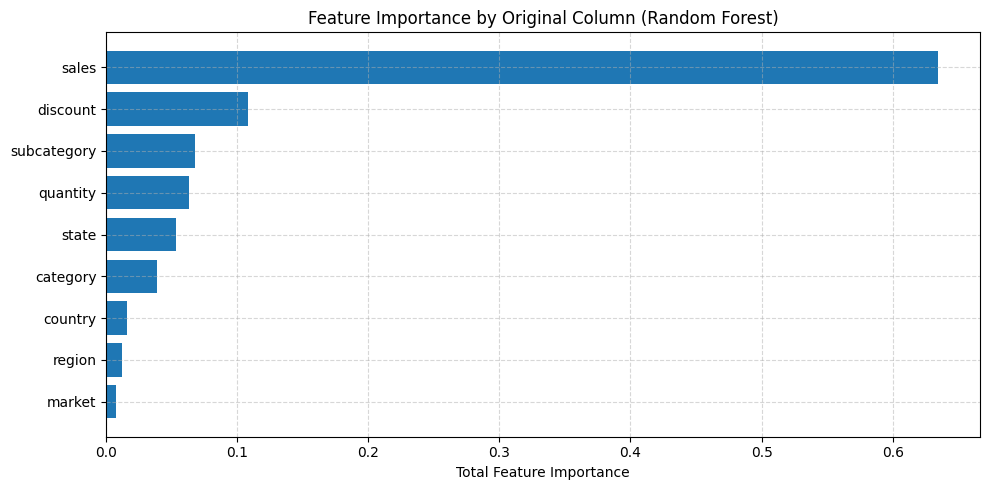

In [65]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# 1. Ambil kembali pipeline terbaik (Random Forest)
best_model_name = 'Random Forest'
best_model = models[best_model_name]

# 2. Fit ulang untuk ambil feature importance
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', best_model)
])
pipeline.fit(X_train, y_train)

# 3. Ambil feature names hasil OneHot + importance-nya
ohe = pipeline.named_steps['preprocess'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_features)
importances = pipeline.named_steps['regressor'].feature_importances_

# 4. Gabungkan fitur turunan ke kolom asal
grouped_importance = defaultdict(list)

for feat_name, imp in zip(feature_names, importances):
    if '_' in feat_name:
        base = feat_name.split('_')[0]
    else:
        base = feat_name
    grouped_importance[base].append(imp)

# 5. Hitung total importance per kolom asli
importance_summary = {
    k: np.sum(v) for k, v in grouped_importance.items()
}

# 6. Buat DataFrame dan sort
importance_df = pd.DataFrame({
    'OriginalFeature': list(importance_summary.keys()),
    'TotalImportance': list(importance_summary.values())
}).sort_values(by='TotalImportance', ascending=False)

# 7. Print dan visualisasi
print("\nFeature Importance berdasarkan kolom asli (Random Forest):")
print(importance_df)

plt.figure(figsize=(10, 5))
plt.barh(importance_df['OriginalFeature'], importance_df['TotalImportance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance by Original Column (Random Forest)')
plt.xlabel('Total Feature Importance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Top 20 Feature Importance (semua fitur hasil OneHot):
                       Feature  Importance
3361             sales_17500.0    0.064080
3377              discount_0.0    0.045204
1     category_Office Supplies    0.038194
3320              sales_4500.0    0.037158
3359             sales_10500.0    0.020624
19          subcategory_Tables    0.019494
3380              discount_0.1    0.019378
3358              sales_9893.0    0.017840
3383              discount_0.2    0.015414
4       subcategory_Appliances    0.014466
3212              sales_3085.0    0.014303
3363                quantity_1    0.014193
12     subcategory_Furnishings    0.012765
3364                quantity_2    0.012698
2994              sales_2178.0    0.012486
3353              sales_8000.0    0.012151
3360             sales_11200.0    0.011799
3352              sales_7959.0    0.011253
3365                quantity_3    0.009781
3347              sales_6355.0    0.008850


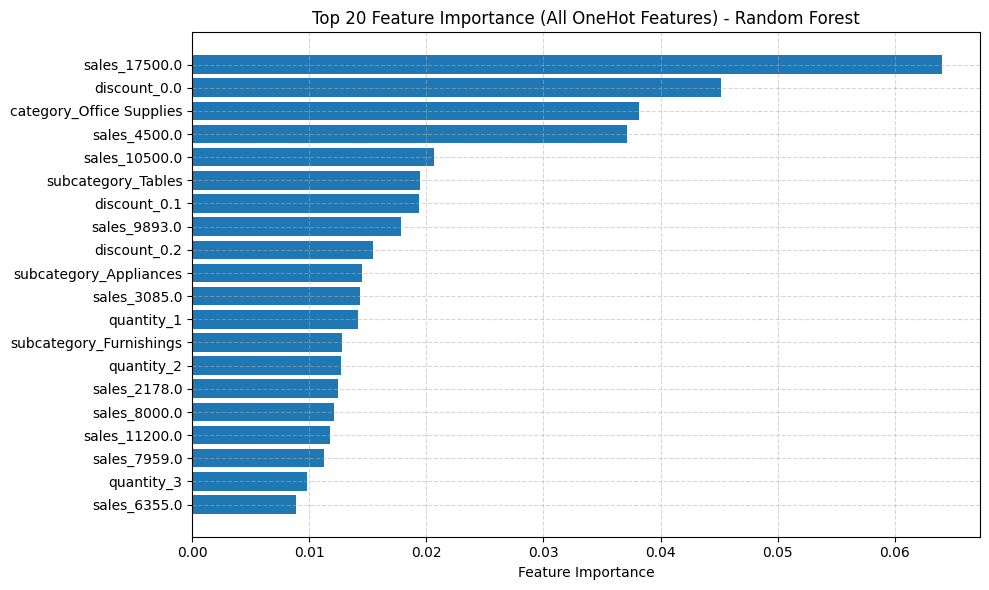

In [69]:
# 1. Buat DataFrame feature importance lengkap
onehot_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 2. Tampilkan top 20 fitur paling penting
print("\nTop 20 Feature Importance (semua fitur hasil OneHot):")
print(onehot_importance_df.head(20))

# 3. Visualisasi top 20
plt.figure(figsize=(10, 6))
plt.barh(onehot_importance_df.head(20)['Feature'], onehot_importance_df.head(20)['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importance (All OneHot Features) - Random Forest')
plt.xlabel('Feature Importance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Top 20 Feature Importance (exclude sales, discount, quantity):
                       Feature  Importance
1     category_Office Supplies    0.038194
19          subcategory_Tables    0.019494
4       subcategory_Appliances    0.014466
12     subcategory_Furnishings    0.012765
3      subcategory_Accessories    0.008570
38       region_Southeast Asia    0.005927
9          subcategory_Copiers    0.004455
17         subcategory_Storage    0.002733
25                market_LATAM    0.002341
26                   market_US    0.001962
7        subcategory_Bookcases    0.001641
179      country_United States    0.001603
114          country_Lithuania    0.001499
652               state_Kaduna    0.001190
1205             state_Vilnius    0.001186
14        subcategory_Machines    0.001080
37                region_South    0.001062
163             country_Sweden    0.000990
526              state_Galicia    0.000966
24                   market_EU    0.000958


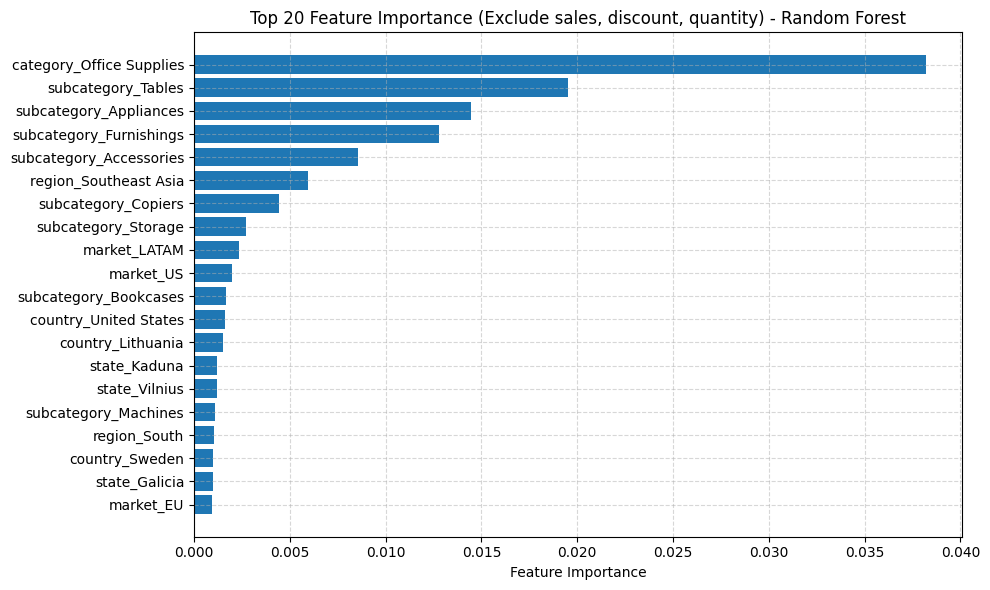

In [68]:
# 1. Buat DataFrame dari semua fitur hasil OneHot + importance
onehot_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 2. Daftar fitur yang ingin di-exclude
exclude_prefix = ['sales', 'discount', 'quantity']

# 3. Filter: buang fitur yang prefix-nya termasuk dalam exclude list
onehot_importance_df = onehot_importance_df[
    ~onehot_importance_df['Feature'].str.startswith(tuple(exclude_prefix))
]

# 4. Urutkan dan tampilkan top 20
onehot_importance_df = onehot_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 Feature Importance (exclude sales, discount, quantity):")
print(onehot_importance_df.head(20))

# 5. Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(onehot_importance_df.head(20)['Feature'], onehot_importance_df.head(20)['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importance (Exclude sales, discount, quantity) - Random Forest')
plt.xlabel('Feature Importance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
